In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold

In [50]:
df = pd.read_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\train_set.csv")
df.head()

,RecordId,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X70,X71,X72,X73,X74,X75,X76,X77,X78,Y
0,1,87.000000,34.118411,0,2,0,165.100000,1,829,2,...,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,82.372284,31.573280,0,0,1,162.983897,1,724,0,...,0.033431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,50.000000,27.771653,0,0,1,165.100000,1,895,2,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,66.236109,26.515922,0,0,1,167.009549,1,637,0,...,0.039363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,81.303299,20.843691,0,0,1,158.165419,0,564,0,...,0.069242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [51]:
# Assuming the target variable is in the last column
X = df.iloc[:, 1:78]  # All columns except the last one
y = df.iloc[:, 78]   # Only the last column

In [52]:
scaled_data = SimpleImputer(strategy='mean')
X = scaled_data.fit_transform(X)
X = pd.DataFrame(X)

In [53]:
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
X_filtered = X.drop(columns=to_drop)
X = X_filtered

C:\Users\Ali\AppData\Local\Temp\ipykernel_4392\3678574268.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [54]:
selector = VarianceThreshold(0.8)
X = selector.fit_transform(X)

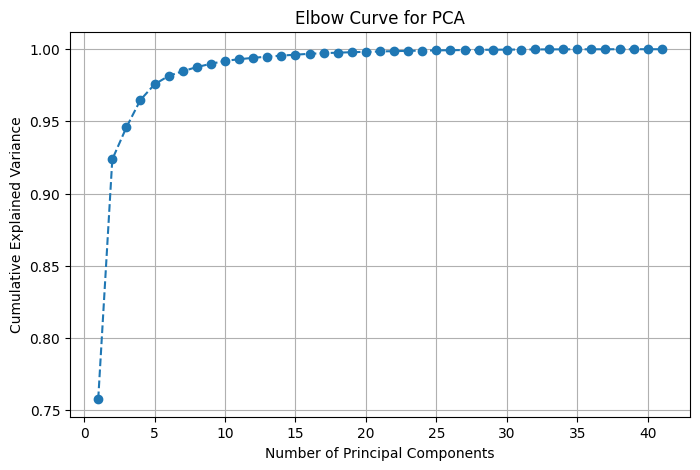

In [55]:
pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')

# Add labels and title
plt.title('Elbow Curve for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

0.8623383401221996


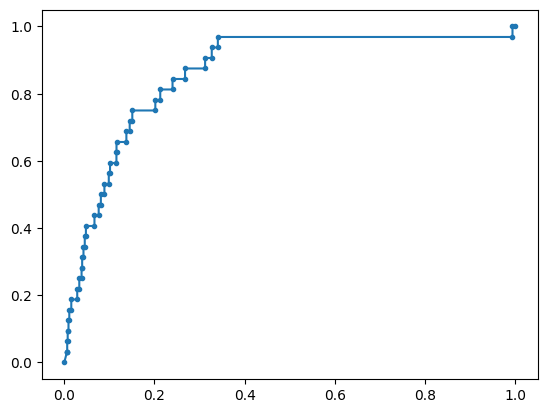

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)
model = GaussianNB()
model.fit(X_train, y_train)
md_predictions_probs = model.predict_proba(X_test)
md_predictions_probs = md_predictions_probs[:, 1]
md_roc = roc_auc_score(y_test, md_predictions_probs)
print(md_roc)
fpr, tpr, _ = roc_curve(y_test, md_predictions_probs, pos_label=1)
plt.plot(fpr, tpr, marker = '.')


In [57]:
model.fit(X,y)

GaussianNB()

In [58]:
test_data = pd.read_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\test_set.csv")
recordId = test_data['RecordId']
test_data = test_data.drop(columns = 'RecordId')

In [59]:
test_data = SimpleImputer(strategy='mean').fit_transform(test_data)
test_data = pd.DataFrame(test_data)
test_data = test_data.drop(columns = to_drop)
test_data = selector.transform(test_data)
# test_data = selector.transform(test_data)
# normalizeTest = Normalizer().fit_transform(test_data)
# standardizedTest = StandardScaler().fit_transform(normalizeTest)
# test_data = pd.DataFrame(standardizedTest)
# test_data = pca.transform(test_data)

In [60]:
prediction = model.predict_proba(test_data)
prediction = prediction[:, 1]
finaldf = pd.concat([recordId, pd.DataFrame(prediction, columns=['Y'])], axis=1)
finaldf.to_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\Naive_Bayes_results.csv", index= False)